In [ ]:
# !pip install tensorflowjs

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Capstone/Dataset'
os.listdir(path)

['train', 'val']

In [ ]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')

In [ ]:
img_width, img_height = 150, 150
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
    )

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
    )

Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size
          )

Epoch 1/30
37/37 [==============================] - 334s 9s/step - loss: 1.3441 - accuracy: 0.4134 - val_loss: 1.4281 - val_accuracy: 0.1406
Epoch 2/30
37/37 [==============================] - 47s 1s/step - loss: 1.2545 - accuracy: 0.4294 - val_loss: 1.4856 - val_accuracy: 0.1562
Epoch 3/30
37/37 [==============================] - 53s 1s/step - loss: 1.1946 - accuracy: 0.4336 - val_loss: 1.4946 - val_accuracy: 0.1562
Epoch 4/30
37/37 [==============================] - 49s 1s/step - loss: 1.1109 - accuracy: 0.5156 - val_loss: 1.3215 - val_accuracy: 0.3719
Epoch 5/30
37/37 [==============================] - 48s 1s/step - loss: 0.9836 - accuracy: 0.5824 - val_loss: 1.0763 - val_accuracy: 0.4406
Epoch 6/30
37/37 [==============================] - 48s 1s/step - loss: 0.9109 - accuracy: 0.5917 - val_loss: 0.9784 - val_accuracy: 0.4844
Epoch 7/30
37/37 [==============================] - 47s 1s/step - loss: 0.8205 - accuracy: 0.6771 - val_loss: 0.8894 - val_accuracy: 0.5250
Epoch 8/30
37/37 [=

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_acc))

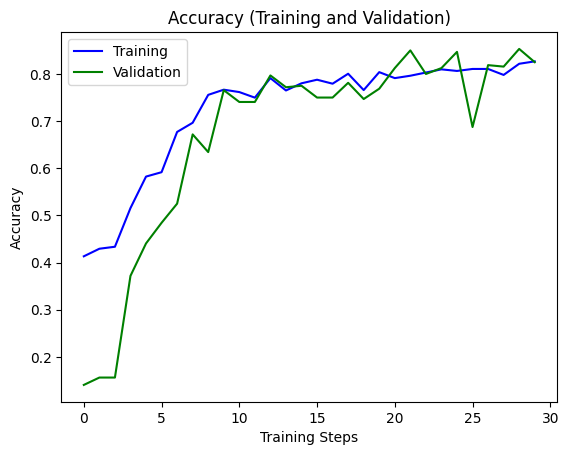

In [ ]:
plt.figure()
plt.title('Accuracy (Training and Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')

plt.plot(acc, 'b', label='Training')
plt.plot(val_acc, 'g', label='Validation')
plt.legend()

plt.show()

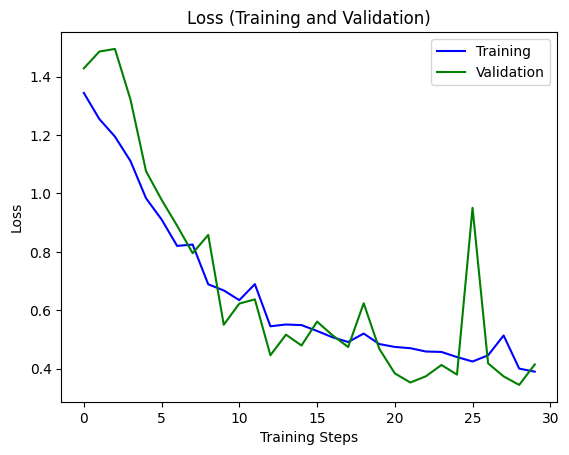

In [ ]:
plt.figure()
plt.title('Loss (Training and Validation)')
plt.ylabel('Loss')
plt.xlabel('Training Steps')

plt.plot(loss, 'b', label='Training')
plt.plot(val_loss, 'g', label='Validation')
plt.legend()

plt.show()

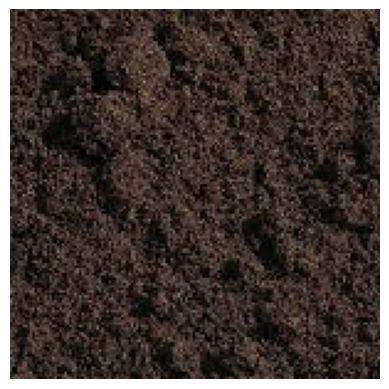

1/1 [==============================] - 0s 224ms/step
True label: Black Soil
Predicted label: Black Soil


In [ ]:
def get_class_string_from_index(index):
    for class_string, class_index in validation_generator.class_indices.items():
        if class_index == index:
            return class_string
    return None

x_batch, y_batch = next(validation_generator)
image = x_batch[0]
true_index = np.argmax(y_batch[0])

plt.imshow(image)
plt.axis('off')
plt.show()

expanded_image = np.expand_dims(image, axis=0)
prediction_scores = model.predict(expanded_image)
predicted_index = np.argmax(prediction_scores)

true_label = get_class_string_from_index(true_index)
predicted_label = get_class_string_from_index(predicted_index)

print(f'True label: {true_label}')
print(f'Predicted label: {predicted_label}')


In [ ]:
# saved_model_path = '/content/drive/MyDrive/Capstone/Model/Soil_Classification.h5'
# model.save(saved_model_path)

In [ ]:
# !pip install tensorrt

In [ ]:
# !tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/Capstone/Model/Soil_Classification.h5' '/content/drive/MyDrive/Capstone/Model/Soil_Classification'